## Rachel Tekchandani

### Logisitc Regression (Binary Classification)
---
#### Predict whether a University applicant will be admitted based on GMAT score and GPA

----

### Feed Foward with a single neuron

## $$ (x^1, y^1), ...,(x^N, y^N) $$

### Where there are N training data points

## $$ x^{(i)} = \begin{bmatrix} \text{student} && \text{GMAT Score} \\ \text{student} && \text{GPA} \end{bmatrix} $$

## $$ y^{(i)} \in \{ 0,1 \} $$

### Where 1 indicates student has been accepted and 0 if not.

<center>![neuron1](neuron1.png)</center>
<center><img src="neuron1.png"></center>

## $$ \sum = z^{(i)} = w^Tx^{(i)} + b $$

## $$ \sigma(x) = \frac{1}{1+e^{-x}} $$

## $$ f = \sigma = \sigma(z^{(i)})= \sigma(w^Tx^{(i)} + b) = \frac{1}{1+e^{-(w^Tx^{(i)} + b)}} = \hat{y}^{(i)} $$


$$  $$ 

$$  $$

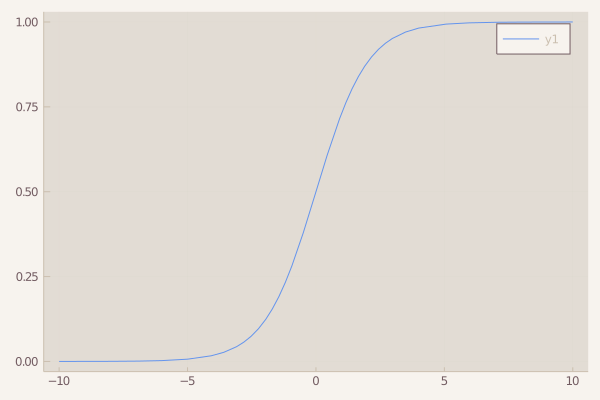

In [1]:
using Plots
theme(:sand)
σ(x) = 1/(1+exp(-x))
plot(σ,-10,10)

### The sigma or sigmoid function, is our S shaped activation function that the output of the linear combination of the weights and biases is entered into.  This gives us a value between 0 and 1 that can be interpretted as a probability.

# The Loss Function (cross-entropy)

---

#### Create a function that maximizing the probability that the $\hat{y}^{(i)}$ predicts $y^{(i)}$.

## $$ \text{Prediction} = \begin{Bmatrix}1 && \text{if} \ \ \hat{y}^{(i)} \geq 0.5 \\ 0 && \text{otherwise}\end{Bmatrix} $$

### Since there are only two discrete outputs, this is subject to the following formula by Bernoulli:

## $$ P(y^{(i)} | x^{(i)}) = \hat{y}^y (1-\hat{y})^{(1-y)} $$

### Take the log of both sides 

### $$ \text{log} P(y|x) = \text{log}[\hat{y}^y (1-\hat{y})^{(1-y)}] $$

### Using the log rules

### $$ \text{log} P(y|x)= y\text{log}\hat{y} + (1-y)\text{log}(1-\hat{y}) $$

### To maximize the probabilty, minimize the negative

### $$ -\text{log} P(y|x)= -[y\text{log}\hat{y} + (1-y)\text{log}(1-\hat{y})] $$

### Minimize the negative log or the  **Cross-Entropy loss function**.  $L_{CE}(\hat{y},y) = -\text{log}P(y|x) $.

### replace $y$ and $\hat{y}$ with the activation function

### $$ -\text{log} P(y|x)= -[y \ \text{log}\sigma(z)+ (1-y)\text{log}(1-\sigma(z))] $$

### $$ -\text{log} P(y|x)= -[y \ \text{log}\sigma(w^Tx^{(i)} + b)+ (1-y)\text{log}(1-\sigma(w^Tx^{(i)} + b))] $$

### $$ = L_{CE}^{(w,b)}$$

### Minmize the loss function with paramaters w and b.


# Train (Stochastic Gradient Descent)
---

### We Want $\hat{\theta} = \text{argmin} L_{\text{CE}}(x,y,\theta )$, where $\theta = w,b$

### $$ \frac{\partial L_{\text{CE}}} {\partial w_j} (w,b) = [ \sigma ( w^T x + b ) - y ] x_j $$

### $$ \frac{\partial L_{\text{CE}}} {\partial b} (w,b) = \sigma ( w^T x + b ) - y $$

### For a given $(x^{(i)}, y^{(i)})$
### $$ w_j^{k+1} = w_j^k - \alpha \cdot \frac{\partial L_{\text{CE}}} {\partial w^k_j} (w^k,b^k) $$
### (for j= 1,2)
### $$ b^{k+1} = b^k - \alpha \cdot \frac{\partial L_{\text{CE}}} {\partial b} (w^k,b^k) $$

---
## We will use our binary classifier on data that shows whether a University Candidate was accepted with their GPA, GMAT and Work expereience.
---

In [78]:
using CSV
data = CSV.read("candidates_data.csv")

,gmat,gpa,work_experience,admitted
,Int64,Float64,Int64,Int64
1,780,4.0,3,1
2,750,3.9,4,1
3,690,3.3,3,0
4,710,3.7,5,1
5,680,3.9,4,0
6,730,3.7,6,1
7,690,2.3,1,0
8,720,3.3,4,1
9,740,3.3,5,1


In [79]:
x_data = [[x[1], x[2], x[3]] for x in zip(data.gmat, data.gpa, data.work_experience)]

40-element Array{Array{Float64,1},1}:
 [780.0, 4.0, 3.0]
 [750.0, 3.9, 4.0]
 [690.0, 3.3, 3.0]
 [710.0, 3.7, 5.0]
 [680.0, 3.9, 4.0]
 [730.0, 3.7, 6.0]
 [690.0, 2.3, 1.0]
 [720.0, 3.3, 4.0]
 [740.0, 3.3, 5.0]
 [690.0, 1.7, 1.0]
 [610.0, 2.7, 3.0]
 [690.0, 3.7, 5.0]
 [710.0, 3.7, 6.0]
 ⋮
 [650.0, 3.7, 6.0]
 [660.0, 3.3, 5.0]
 [640.0, 3.0, 1.0]
 [620.0, 2.7, 2.0]
 [660.0, 4.0, 4.0]
 [660.0, 3.3, 6.0]
 [680.0, 3.3, 5.0]
 [650.0, 2.3, 1.0]
 [670.0, 2.7, 2.0]
 [580.0, 3.3, 1.0]
 [590.0, 1.7, 4.0]
 [690.0, 3.7, 5.0]

## We will split the data into the first and second half.  We will use the first half for training. The second half will be for testing.  Split the data and check that the two lengths add to the total of the original.

In [89]:
x_train = x_data[1:20]
x_test = x_data[21:40]
length(x_train) + length(x_test) == length(x_data)

true

In [81]:
y_data = [x for x in data.admitted]

40-element Array{Int64,1}:
 1
 1
 0
 1
 0
 1
 0
 1
 1
 0
 0
 1
 1
 ⋮
 1
 1
 0
 0
 1
 1
 1
 0
 0
 0
 0
 1

In [86]:
y_train = y_data[1:20]
y_test  = y_data[21:40]
length(y_train)+length(y_test) == length(y_data)

true

In [ ]:
"""
    σ(x)

Compute the sigma (σ) of x which is defined mathematically as 1 / (1+e^(-x)

input   : x the value to be computed

returns : the value of the calculation
```
"""
σ(x) = 1/(1+exp(-x))

In [25]:
"""
    cross_entropy_loss(x, y, w, b)

Compute the loss function

input   : x - feature vector (the GPA, GMAT and work experience of the candidate)
input   : y - correct classification (Accepted or not)
input   : w - weights for each of the values of x going into the logistic function
input   : b - the bias or threshold value


returns : the cross entropy loss calculation given the above as inputs
```
"""
#create loss entropy loss function
function cross_entropy_loss(x, y, w, b)
    return -y * log(σ(w'x+ b)) - (1-y)*log(1 - σ(w'x+b))
end

cross_entropy_loss (generic function with 1 method)

In [90]:
"""
    average_cost(features, labels, w, b)

Compute the loss function

input   : features - feature vector (the GPA, GMAT and work experience of the candidate)
input   : labels - correct classification (Accepted or not)
input   : w - weights for each of the values of x going into the logistic function
input   : b - the bias or threshold value


returns : the amount of error observed for the amount of data used
```
"""
function average_cost(features, labels, w, b)
    N = length(features)
    return (1/N)*sum([cross_entropy_loss(features[i], labels[i], w, b) for i = 1:N])
end

average_cost

In [91]:
"""
    function batch_gradient_descent(features, labels, w, b, α)

Performs gradient descent on the data

input   : features - feature vector (the GPA, GMAT and work experience of the candidate)
input   : labels - correct classification (Accepted or not)
input   : w - initial weights for each of the values of x going into the logistic function
input   : b - intial bias 
input   : α - learning rate, the amount of change to the weights and bias

returns : trained weights and bias after a step has been performed
```
"""

function batch_gradient_descent(features, labels, w, b, α)
    del_w = [0.0 for i = 1:length(w)]
    del_b = 0.0
    N = length(features)
    
    for i = 1:N
        del_w += (σ(w'features[i]+b) - labels[i])*features[i]
        del_b += (σ(w'features[i]+b) - labels[i])
    end
    
    w = w - α*del_w
    b = b - α*del_b
    
    return w, b
end

batch_gradient_descent (generic function with 1 method)

In [92]:
# test function with 0.0,0.0 weights initial, 0.0 bias and 0.0001 step size
w, b = batch_gradient_descent(x_train, y_train, [0.0, 0.0, 0.0], 0.0, 0.0001)

([0.044500000000000005, 0.0004200000000000001, 0.0010500000000000002], 0.0)

In [99]:
# check to see, based on cost that we are going in the right direction
w = [0.0, 0.0, 0.0]
b = 0.0
step = 0.00001
println("The initial cost is: ", average_cost(x_train, y_train, w, b))


w, b = batch_gradient_descent(x_train, y_train, w, b, step)
println("The new cost is: ", average_cost(x_train, y_train, w, b))

w, b = batch_gradient_descent(x_train, y_train, w, b, step)
println("The new cost is: ", average_cost(x_train, y_train, w, b))


The initial cost is: 0.6931471805599453
The new cost is: 1.464413816269031
The new cost is: 19.1459615815847


In [101]:
# the above results indicate that the step size is too large.  
# We need to repeat with smaller step size

w = [0.0, 0.0, 0.0]
b = 0.0
step = 0.000000001
println("The initial cost is: ", average_cost(x_data, y_data, w, b))


w, b = batch_gradient_descent(x_data, y_data, w, b, step)
println("The new cost is: ", average_cost(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, step)
println("The new cost is: ", average_cost(x_data, y_data, w, b))

The initial cost is: 0.6931471805599451
The new cost is: 0.6931468088570281
The new cost is: 0.6931464402540243


In [104]:
# the above output indicates that the step is too small
# repeat with a larger and ensure that it is getting smaller
w = [0.0, 0.0, 0.0]
b = 0.0
step = 0.0000001
println("The initial cost is: ", average_cost(x_data, y_data, w, b))


w, b = batch_gradient_descent(x_data, y_data, w, b, step)
println("The new cost is: ", average_cost(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, step)
println("The new cost is: ", average_cost(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, step)
println("The new cost is: ", average_cost(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, step)
println("The new cost is: ", average_cost(x_data, y_data, w, b))

The initial cost is: 0.6931471805599451
The new cost is: 0.6931177157407156
The new cost is: 0.6931074013001591
The new cost is: 0.6931032778951178
The new cost is: 0.6931011560327422


In [109]:
"""
    train_batch_gradient_descent(features, labels, w, b, α, epochs)

Performs gradient descent on the data

input   : features - feature vector (the GPA, GMAT and work experience of the candidate)
input   : labels - correct classification (Accepted or not)
input   : w - initial weights for each of the values of x going into the logistic function
input   : b - intial bias 
input   : α - learning rate, the amount of change to the weights and bias
input   : epochs - how many times to run the update

returns : trained weights and bias after a step has been performed.
          also prints the cost function at 100,1000,10000, etc epochs
```
"""


function train_batch_gradient_descent(features, labels, w, b, α, epochs)
    
    for i = 1:epochs
        j = rand([x for x in length(features)])
        w,b = batch_gradient_descent(features, labels, w, b, α)
        
        if i == 1
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
        end
        
        if i == 100
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
        end
        
        if i == 1000
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
        end

        if i == 10000
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
        end
                        
        if i == 100000
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
        end
                        
        if i == 1000000
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
        end

         if i == 10000000
            println("Epoch ", i, " with loss: ", average_cost(features, labels, w, b) )
         end
    end
    
    return w, b
end

train_batch_gradient_descent (generic function with 1 method)

In [110]:
w = randn(3) # initlaze with random weights
b = randn(1)[1] # random bias

w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: NaN
Epoch 100 with loss: NaN
Epoch 1000 with loss: NaN
Epoch 10000 with loss: 0.7088820618671335


([-0.0003556207243116096, 1.78671706219673, -0.5852586008155235], -3.220108727980861)

In [111]:
# rather than random, try again with zero
w, b = train_batch_gradient_descent(x_train, y_train, [0.0, 0.0, 0.0], 0.0, 0.000001, 100000)

Epoch 1 with loss: 0.6947610336910675
Epoch 100 with loss: 0.8965942654085093
Epoch 1000 with loss: 0.8933863075417117
Epoch 10000 with loss: 0.8608287841248906
Epoch 100000 with loss: 0.5458935141054073


([-0.0034322709792326904, 0.1396068685865824, 0.5259463149395227], -0.06333317899438108)

In [112]:
# repeat training to obtain lower cost, better performancem, continuing the same weights and biase as input
w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: 0.5448545091935185
Epoch 100 with loss: 0.5430198004193282
Epoch 1000 with loss: 0.542985233510204
Epoch 10000 with loss: 0.5426421979879512


([-0.0032097288355285797, 0.1403572973947398, 0.5285336555309248], -0.06394887120261901)

In [113]:
# keep trying, would like a cost of less than 0.5
w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: 0.5426421601372262
Epoch 100 with loss: 0.5426384132044668
Epoch 1000 with loss: 0.5426043764098233
Epoch 10000 with loss: 0.5422665910412652


([-0.0032261062569065844, 0.14110168615558116, 0.5310984938850596], -0.06456476415771177)

In [114]:
w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: 0.5422665537687784
Epoch 100 with loss: 0.5422628640760397
Epoch 1000 with loss: 0.5422293471385554
Epoch 10000 with loss: 0.5418967105156732


([-0.0032423492308344707, 0.1418412316974545, 0.5336423570477462], -0.06518051080196813)

In [115]:
w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: 0.541896673810274
Epoch 100 with loss: 0.5418930402537466
Epoch 1000 with loss: 0.5418600331503418
Epoch 10000 with loss: 0.5415324461770251


([-0.0032584592809632956, 0.1425759920874105, 0.5361654810047471], -0.06579611242520751)

In [116]:
w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: 0.5415324100278166
Epoch 100 with loss: 0.5415288315288166
Epoch 1000 with loss: 0.5414963244645234
Epoch 10000 with loss: 0.5411736902961483


([-0.00327443790784152, 0.1433060244684969, 0.5386680982069697], -0.06641157029950655)

In [117]:
w, b = train_batch_gradient_descent(x_train, y_train, w, b, 0.0000001, 10000)

Epoch 1 with loss: 0.5411736546924802
Epoch 100 with loss: 0.5411701301967934
Epoch 1000 with loss: 0.5411381135988025
Epoch 10000 with loss: 0.5408203375835526


([-0.003290286589341863, 0.14403138507717855, 0.5411504376345206], -0.06702688567949266)

In [118]:
# thats ok if its not less than 0.5, we will now check the amount of error using the test data

In [119]:
"""
    function predict(x, y, w, b)

Outputs a prediction of addmitted or not dependent on weights and biases

input   : x - feature vector (the GPA, GMAT and work experience of the candidate)
input   : labels - correct classification (Accepted or not)
input   : w - initial weights for each of the values of x going into the logistic function
input   : b - intial bias 


returns : prints to the screen the prediction and actual label
```
"""
# function that prints the prediction and the 
function predict(x, y, w, b)
    if σ(w'x+b) >= 0.5
        println("Predict Accepted")
        y == 1 ? println("Was Accepted") : println("[ERROR] Was Not accepted")
    else
        println("Predict Not Accepted")
        y == 1 ? println("[ERROR] Was Accepted") : println("Was Not Accepted")
    end
end
        

predict (generic function with 1 method)

In [120]:
for i = 1:length(x_test)
    predict(x_test[i], y_test[i], w, b)
    println()
end

Predict Not Accepted
[ERROR] Was Accepted

Predict Not Accepted
Was Not Accepted

Predict Accepted
[ERROR] Was Not accepted

Predict Not Accepted
Was Not Accepted

Predict Not Accepted
Was Not Accepted

Predict Accepted
Was Accepted

Predict Accepted
Was Accepted

Predict Not Accepted
Was Not Accepted

Predict Accepted
Was Accepted

Predict Accepted
Was Accepted

Predict Not Accepted
Was Not Accepted

Predict Not Accepted
Was Not Accepted

Predict Accepted
Was Accepted

Predict Accepted
Was Accepted

Predict Accepted
Was Accepted

Predict Not Accepted
Was Not Accepted

Predict Not Accepted
Was Not Accepted

Predict Not Accepted
Was Not Accepted

Predict Accepted
[ERROR] Was Not accepted

Predict Accepted
Was Accepted



In [121]:
"""
    function predict(x, y, w, b)

Outputs a prediction of addmitted or not dependent on weights and biases

input   : x - feature vector (the GPA, GMAT and work experience of the candidate)
input   : labels - correct classification (Accepted or not)
input   : w - initial weights for each of the values of x going into the logistic function
input   : b - intial bias 


returns : 0 or 1, used for numerical computation of error
```
"""
function predict(x, y, w, b)
    if σ(w'x+b) >= 0.5
        return 1
    else
        return 0
    end
end
      

predict (generic function with 1 method)

In [125]:
"""
    function calculate_error(x, y, w, b)

Outputs a error amount based on input data and given weights and bias

input   : x - feature vector (the GPA, GMAT and work experience of the candidate)
input   : y - correct classification (Accepted or not)
input   : w - initial weights for each of the values of x going into the logistic function
input   : b - intial bias 


returns : 0 or 1, used for numerical computation of error
```
"""
function calculate_error(x, y, w, b)
    mean_error = 0.0
    for i = 1:length(x)
        mean_error += (predict(x[i], y[i], w, b) - y[i])^2
    end

    print(mean_error/length(x))
end

calculate_error

In [126]:
calculate_error(x_test,y_test,w,b)

0.15

---
Using the data and result we can conclude that the model can accurately predict if someone will be admitted based on a logistic combination of their GPA, GMAT and amount of work experience